In [8]:
# !pip install backtrader
# !pip install yfinance --upgrade --no-cache-dir
# !pip install ipympl
# !pip install ipywidgets

In [9]:
import datetime
from model import volatility
from model import trading_intensity
from model import AvellanedaStoikov
import pandas as pd
import numpy as np
orderbook_df = pd.read_csv ('Data/historical_ETHUSDT_orderbook_data.csv')
kline_full_df = pd.read_csv('Data/historical_ETHUSDT_kline_data.csv')

kline_next_df = kline_full_df.copy()
kline_next_df['Datetime'] = kline_next_df['Datetime'].apply(lambda x: datetime.datetime.fromtimestamp(int(x) / 1000) )    

kline_reduced_array = []

for datetime in np.unique( kline_full_df['Datetime'].tolist() ):
    kline_reduced_array.append( kline_next_df[kline_full_df['Datetime'] == datetime].tail(1) )

kline_next_df = pd.concat(kline_reduced_array, axis=0)

kline_next_df.set_index('Datetime', inplace=True)

kline_next_df.head()

,Open,High,Low,Close,Volume
Datetime,,,,,
2024-03-14 23:14:00,3753.36,3753.96,3747.97,3752.54,3437.220
2024-03-14 23:15:00,3752.54,3766.51,3749.00,3765.91,5230.063
2024-03-14 23:16:00,3765.91,3767.97,3762.01,3762.01,3524.484
2024-03-14 23:17:00,3762.01,3762.01,3748.39,3753.72,7196.243
2024-03-14 23:18:00,3753.72,3755.63,3749.49,3749.50,6817.658


In [10]:
kline_next_df.tail()

,Open,High,Low,Close,Volume
Datetime,,,,,
2024-03-15 19:06:00,3720.07,3720.67,3714.00,3716.90,1698.676
2024-03-15 19:07:00,3716.90,3718.89,3714.49,3715.70,2018.968
2024-03-15 19:08:00,3715.71,3719.50,3715.45,3719.01,826.575
2024-03-15 19:09:00,3719.00,3724.00,3719.00,3723.22,747.899
2024-03-15 19:10:00,3723.22,3724.82,3719.48,3722.43,1139.199


In [11]:
kline_full_df.head()

,Datetime,Open,High,Low,Close,Volume
0,1710472440000,3753.36,3753.96,3748.6,3749.64,1039.917
1,1710472440000,3753.36,3753.96,3748.6,3749.65,1067.768
2,1710472440000,3753.36,3753.96,3748.6,3749.65,1068.247
3,1710472440000,3753.36,3753.96,3748.6,3749.69,1102.720
4,1710472440000,3753.36,3753.96,3748.6,3749.69,1109.573


In [12]:
orderbook_df.head()

,Datetime,bidp0,bidp1,bidp2,bidp3,bidp4,bidp5,bidp6,bidp7,bidp8,...,askv0,askv1,askv2,askv3,askv4,askv5,askv6,askv7,askv8,askv9
0,1710472459391,3749.71,3749.70,3749.69,3749.67,3749.65,3749.64,3749.60,3749.58,3749.57,...,14.474,0.006,0.007,0.540,0.053,0.266,0.948,2.000,0.053,0.014
1,1710472459509,3749.71,3749.70,3749.69,3749.67,3749.65,3749.64,3749.60,3749.58,3749.57,...,15.250,0.006,0.007,0.540,0.053,0.266,0.948,2.000,0.053,0.021
2,1710472459616,3749.64,3749.61,3749.60,3749.57,3749.56,3749.55,3749.53,3749.52,3749.50,...,23.221,2.000,5.289,18.722,0.006,0.533,0.007,0.266,0.053,0.540
3,1710472459726,3749.64,3749.63,3749.60,3749.57,3749.56,3749.55,3749.53,3749.52,3749.50,...,51.798,2.000,0.007,8.033,0.533,0.007,0.266,0.053,0.540,0.053
4,1710472459833,3749.46,3749.44,3749.43,3749.42,3749.37,3749.34,3749.32,3749.29,3749.27,...,10.347,0.053,0.010,0.053,1.439,0.180,15.903,2.475,6.432,0.533


In [13]:
sigma = 2
gamma = 0.01
eta = 0.005

for i in range(1,10):
    k = trading_intensity(orderbook_df , 1710472440000 + i * 60000)
    
    as1 = AvellanedaStoikov(3816.80, 50, sigma, gamma, k * 1000 , eta , 1 , 0.001)

    print( k , as1.reservation_price() , as1.optimal_bid_ask_spread() , as1.optimal_bid() , as1.optimal_ask() ,
         as1.bid_size(50 , 10000) , as1.ask_size(50 , 10000) )

-0.008628478878800905 3814.802 -0.1919649866823752 3814.8979824933413 3814.706017506659 2.0414721092027635 2.6214339857665174
-0.0013989951535511907 3814.802 -1.3947713703277502 3815.499385685164 3814.1046143148365 2.0411503301331355 2.6218473301620215
-0.007512004121650175 3814.802 -0.22645790297885982 3814.9152289514896 3814.6887710485107 2.0414628801213346 2.621445837441513
0.006011067551839547 3814.802 0.37240315215210723 3814.615798423924 3814.9882015760763 2.0416231259598416 2.621240085583679
0.03901382567124141 3814.802 0.09121730917170458 3814.756391345414 3814.847608654586 2.0415478818995627 2.6213366891283982
0.0012064170462286585 3814.802 1.6909284780183151 3813.956535760991 3815.6474642390094 2.041976031370825 2.6207871910919303
-0.006485700839296758 3814.802 -0.2686486592214082 3814.9363243296107 3814.6676756703896 2.0414515914843263 2.621460334219704
0.08286792516158246 3814.802 0.06409333424067835 3814.7699533328796 3814.8340466671207 2.0415406239398104 2.621346008153783

In [19]:
k = trading_intensity(orderbook_df , 1710472440000 + 23 * 60000	)

k

0.03722802300323192

In [20]:
# https://blog.quantinsti.com/backtrader/
import datetime
import backtrader as bt
import yfinance as yf

from backtrader import Order

def str_to_timestamp( s ):
    return int( datetime.datetime.strptime(s, '%Y-%m-%d %H:%M:%S').timestamp() * 1000 )

orderbook_timestamp = orderbook_df['Datetime'].tolist()

def smallest_timestamp_before( t ):
    for i in range(len(orderbook_timestamp)):
        if orderbook_timestamp[i] > t:
            return int(orderbook_timestamp[i-1])

def time_percentage( t ):
    start_time = kline_full_df.iloc[1]['Datetime']
    end_time = kline_full_df.iloc[-1]['Datetime']
    time_diff = end_time - start_time
    return (t - start_time ) /(end_time - start_time)

class MAstrategy(bt.Strategy):
	# when initializing the instance, create a 100-day MA indicator using the closing price
    def __init__(self):
        #self.ma = bt.indicators.SimpleMovingAverage(self.data.close, period=2)
        self.orders = []
        
        #print( str_to_timestamp( str( self.datas[0].datetime.date() ) + " " + str( self.data.datetime.time() )   ) 

    def next(self):
        time = str_to_timestamp( str( self.datas[0].datetime.date() ) + " " + str( self.data.datetime.time() )   )  
        start_time = kline_full_df.iloc[1]['Datetime']
        end_time = kline_full_df.iloc[-1]['Datetime']
        
        if start_time >= time:
            return

        if end_time <= time:
            return
        
        ask_price_at_time = orderbook_df[orderbook_df["Datetime"] == smallest_timestamp_before(  time	)].iloc[0] ['askp0']
        bid_price_at_time = orderbook_df[orderbook_df["Datetime"] == smallest_timestamp_before(  time	)].iloc[0] ['bidp0']
        
        s = 0.5 * ( ask_price_at_time + bid_price_at_time )

        sigma = volatility(kline_full_df , time)

        k = trading_intensity(orderbook_df , time)

        eta = 0.005
        
        gamma = 0.1

        qt = self.position.size
        
        AS = AvellanedaStoikov(s, qt, sigma, gamma, k * 1000 , eta , 1 , time_percentage(time) )
        
        #print(self.position.size)
        #print(self.stats.broker.cash[0] , self.stats.broker.value[0])

        #print( s , AS.optimal_bid() , AS.optimal_ask() )

        if k > 0 :
            for order in self.orders:
                self.broker.cancel(order)
            self.log('Buy Limit Create, %.2f' % AS.optimal_bid())
            order = self.buy(exectype=Order.Limit, price=AS.optimal_bid() , size=AS.bid_size(qt , self.stats.broker.value[0] * 0.5) )
            self.log('Sell Limit Create, %.2f' % AS.optimal_ask())
            order = self.sell(exectype=Order.Limit, price=AS.optimal_ask() , size=AS.bid_size(qt , self.stats.broker.value[0] * 0.5) )
            self.log('Account Value, %.2f' % self.stats.broker.value[0] )
        
        '''
        if self.order:
            return
        if not self.position: # check if you already have a position in the market
            if (self.data.close[0] > self.ma[0]) & (self.data.close[-1] < self.ma[-1]):
                self.log('Buy Create, %.2f' % self.data.close[0])
                self.order = self.buy(size=0) # buy when closing price today crosses above MA.
            if (self.data.close[0] < self.ma[0]) & (self.data.close[-1] > self.ma[-1]):
                self.log('Sell Create, %.2f' % self.data.close[0])
                self.order = self.sell(size=1)  # sell when closing price today below MA
        else:
        # This means you are in a position, and hence you need to define exit strategy here.
            if len(self) >= (self.bar_executed + 4):
                self.log('Position Closed, %.2f' % self.data.close[0])
                self.order = self.close()    
        '''
 
	# outputting information
    def log(self, txt):
        dt = str( self.datas[0].datetime.date() ) + " " + str( self.data.datetime.time() )
        print('%s, %s' % (dt, txt))
    
    def notify_order(self, order):
        if order.status == order.Completed:
            if order.isbuy():
                self.log(
                "Executed BUY (Price: %.2f, Value: %.2f, Commission %.2f)" %
                (order.executed.price, order.executed.value, order.executed.comm))
            else:
                self.log(
                "Executed SELL (Price: %.2f, Value: %.2f, Commission %.2f)" %
                (order.executed.price, order.executed.value, order.executed.comm))
            self.bar_executed = len(self)
        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log("Order was canceled/margin/rejected")
        self.order = None

<START> Brokerage account: $10000.00
2024-03-14 23:18:00, Buy Limit Create, 3752.93
2024-03-14 23:18:00, Sell Limit Create, 3753.28
2024-03-14 23:18:00, Account Value, 10000.00
2024-03-14 23:19:00, Executed BUY (Price: 3749.49, Value: 3749.49, Commission 0.00)
2024-03-14 23:19:00, Buy Limit Create, 3749.45
2024-03-14 23:19:00, Sell Limit Create, 3749.51
2024-03-14 23:19:00, Account Value, 10000.00
2024-03-14 23:20:00, Executed BUY (Price: 3746.00, Value: 4970.48, Commission 0.00)
2024-03-14 23:20:00, Buy Limit Create, 3745.14
2024-03-14 23:20:00, Sell Limit Create, 3746.76
2024-03-14 23:20:00, Account Value, 9996.51
2024-03-14 23:21:00, Executed BUY (Price: 3739.04, Value: 4932.39, Commission 0.00)
2024-03-14 23:22:00, Buy Limit Create, 3720.38
2024-03-14 23:22:00, Sell Limit Create, 3720.47
2024-03-14 23:22:00, Account Value, 9914.29
2024-03-14 23:23:00, Executed BUY (Price: 3720.38, Value: 4867.59, Commission 0.00)
2024-03-14 23:23:00, Executed SELL (Price: 3728.81, Value: 4890.75, C

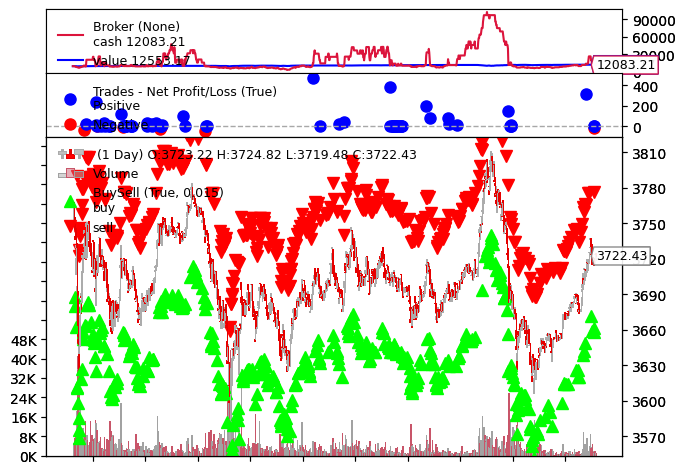

In [22]:
cerebro = bt.Cerebro()
cerebro.addstrategy(MAstrategy)
cerebro.broker.setcash(10000)
cerebro.broker.setcommission(commission=0.000 , leverage=10)
data = bt.feeds.PandasData(dataname=kline_next_df )
cerebro.adddata(data)
   
print('<START> Brokerage account: $%.2f' % cerebro.broker.getvalue())
cerebro.run()
print('<FINISH> Brokerage account: $%.2f' % cerebro.broker.getvalue())
%matplotlib inline
# Plot the strategy
img = cerebro.plot(style='candlestick',loc='grey', grid=False, iplot=False) #You can leave inside the paranthesis empty

img[0][0].savefig('Data/plot.png')

In [18]:
k = trading_intensity(orderbook_df , 1710518220000 )
k

0

In [17]:
k = trading_intensity(orderbook_df , 1710518280000 )
k

-0.006359493684606801